In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Load the Titanic dataset
titanic_df = pd.read_csv('train.csv')

# Drop rows with missing values in the 'Age' column
titanic_df_age = titanic_df.dropna(subset=['Age'])

# Define features (X) and target variable (y)
X = titanic_df_age[['Pclass', 'SibSp', 'Parch', 'Fare']]
y = titanic_df_age['Survived']  # Use 'Survived' as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[74 13]
 [32 24]]


Confusion Matrix:
[[74 13]
 [32 24]]
Accuracy: 0.6853146853146853
Precision: 0.6486486486486487
Recall: 0.42857142857142855
F1 Score: 0.5161290322580645
Specificity: 0.8505747126436781
Sensitivity: 0.42857142857142855


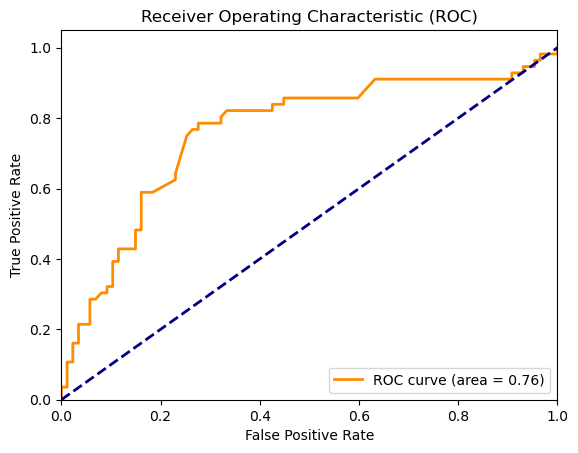

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic_df = pd.read_csv('train.csv')

# Drop rows with missing values in the 'Age' column
titanic_df_age = titanic_df.dropna(subset=['Age'])

# Define features (X) and target variable (y)
X = titanic_df_age[['Pclass', 'SibSp', 'Parch', 'Fare']]
y = titanic_df_age['Survived']  # Use 'Survived' as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Compute specificity and sensitivity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

# Plot ROC curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
